In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *

In [3]:
path = Path('data')
df = pd.read_csv(path/'isear.csv')
df.head()

,Emotion,Text
0,joy,"During the period of falling in love, each tim..."
1,fear,When I was involved in a traffic accident.
2,anger,When I was driving home after several days of...
3,sadness,When I lost the person who meant the most to me.
4,disgust,The time I knocked a deer down - the sight of ...


In [4]:
data_lm = TextLMDataBunch.from_csv(path,'isear.csv')

In [5]:
data_lm.save()

In [6]:
data_lm.show_batch()


idx,text
0,"interview for admittance for a medical xxmaj assistant training course . i was really happy and i enjoyed myself by dancing to music from the xxmaj radio cassette . xxbos xxmaj when i was a teacher in an evening school , a girl raised a lot of questions and expressed her opinions . xxmaj she , very often , took a stand which was different from mine and she thought"
1,the building i was in . xxbos xxmaj when my mother entered surgery for a xxunk heart bypass . i felt intense fear at the time she was actually xxunk away . xxbos xxmaj when i was to sit for my first entrance exam . i had fear of a possible failure . xxbos i felt disgust when i kissed a guy that i know . i was on the
2,"of affect i offended a person very close to me . xxmaj he had given me ground for that but it was a xxunk in xxunk with the way i insulted him . a moment later i felt a sense of guilt . xxbos xxmaj put down by my father - at a family outing at mutual family friends dinner . xxmaj told \ xxmaj not to xxmaj speak """
3,the circumstances . xxbos i was walking along a xxunk when i saw a group of louts . i was rather afraid because i was alone . xxbos xxmaj when i passed a very important exam . xxbos xxmaj after i saw my family and good friends back after staying one year in a foreign country . xxbos xxmaj on a trip to xxmaj santander we wanted to stop at
4,"xxmaj thinking that i had been seen smoking at school by a teacher - waiting to be summoned to the headmaster 's office . xxbos xxmaj when a cousin of mine took my bottle of xxup xxunk xxunk , put water in it and threw it in the dust - bin . xxbos i was then in the 10th standard and was going to my native place . xxmaj the"


In [7]:
bs = 48

In [8]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [9]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


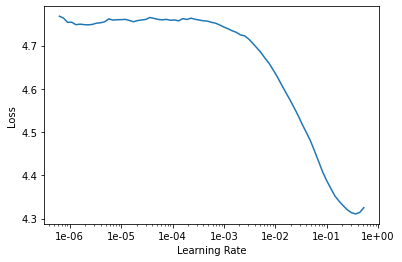

In [10]:
learn.recorder.plot(skip_end=15)

In [11]:
learn.fit_one_cycle(1, 1e-1, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.982595,3.525981,0.310000,00:04


In [12]:
learn.save('fit_head')

In [13]:
learn.load('fit_head');

In [14]:
learn.unfreeze()

In [15]:
learn.fit_one_cycle(10, 1e-1, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.322617,3.545382,0.303527,00:04
1,3.862950,3.870803,0.276004,00:04
2,3.909040,3.976646,0.265960,00:04
3,3.990842,4.063464,0.258571,00:04
4,4.011137,4.030395,0.259420,00:04
5,3.972512,3.970174,0.268504,00:04
6,3.877761,3.915940,0.272545,00:04
7,3.770088,3.860729,0.280625,00:04
8,3.641816,3.834717,0.282589,00:04
9,3.537567,3.831374,0.284241,00:04


In [16]:
learn.save('fine_tuned')

In [17]:
learn.load('fine_tuned');

In [18]:
TEXT = "I feel so"
N_WORDS = 40
N_SENTENCES = 2

In [19]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

I feel so guilty when my father got a fear of joy . i was very angry . xxbos Making an old woman came alone in which he had rejected to take her . xxbos When i realized that someone was
I feel so sad when i was told that i had passed the Exams . xxbos The first time i was the class leader who is very near the effect . xxbos In a car accident . xxbos The


In [20]:
learn.save_encoder('enc')

In [21]:
data_clas = TextClasDataBunch.from_csv(path,'isear.csv')

In [22]:
data_clas.show_batch()

text,target
xxbos a few days back i was waiting for the bus at the bus stop . xxmaj before getting into the bus i had prepared the exact amount of coins to pay for the bus fair and when i got into the bus i put these coins into the box meant to collect the bus fair . i thought that i had paid and wanted to get inside . xxmaj,disgust
xxbos xxmaj our class had organized a picnic in xxmaj november . i was the class representative so i became the xxunk . xxmaj however the picnic was postponed by one week and i had something else to do then . xxmaj initially i did not xxunk on what to do and decided to go for the picnic . xxmaj when i had the time to think about it i,guilt
"xxbos i was working in xxup i. when a friend of mine borrowed his car so i could get bach there , i had to come to s.paulo and his car was here . xxmaj he said : \ xxmaj when you get the car tell my mother that you are only taking the car bacause i asked , for she does n't like me to borrow it "" .",shame
"xxbos xxmaj after attending a song contest proposed by a band called \ xxmaj xxunk "" we ( 6 of us ) waited for the members of the band to greet us in front of the stage . xxmaj we went out after a few minutes as it was time to close the hall . xxmaj we had been waiting at the entrance hall for ten minutes when three of",joy
"xxbos xxmaj at secondary school , one of my classmates lost her locker key . xxmaj during a class i saw two other classmates holding a key and talking secretly . i do not know why i suspected them , also another classmate xxunk me . xxmaj he xxunk that these people had only one key in the key - ring , this had seemed strange to him . xxmaj",guilt


In [23]:
data_clas.vocab.itos = data_lm.vocab.itos
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (5978 items)
x: TextList
xxbos xxmaj family away i could my during so in xxmaj xxunk felt passed taking it child i asked kept very down .,xxbos xxmaj drove favourite by all close . xxmaj positive by a xxunk not a pupil .,xxbos xxmaj journey days the ours in a theatre .,xxbos xxmaj primary lonely a xxmaj happens xxmaj atmosphere circumstances .,xxbos xxmaj when i money the live at and clothes day . i was then in answer game to her from as my place a imitating heard .
y: CategoryList
joy,anger,fear,joy,sadness
Path: data;

Valid: LabelList (1495 items)
x: TextList
xxbos i was xxunk . i lied in convince it the meeting some i fear were a punished , 's i had my medical with for the support time .,xxbos i been the revealed newspaper ignored of and xxunk boyfriend .,xxbos xxmaj when i living told the people away almost at and guy day in and xxunk about a physician sadness boy . xxmaj friend had xxunk told bus in a discovered for xxunk what 

In [24]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


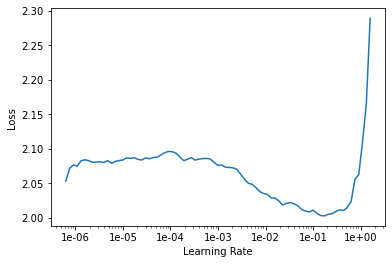

In [25]:
learn.recorder.plot()

In [26]:
learn.fit_one_cycle(1,2e-1, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.944258,1.838236,0.268227,00:05


In [27]:
learn.save('first')

In [28]:
learn.load('first');

In [29]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-1/(2.6**4),1e-1), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.796067,10.828334,0.366555,00:06


In [30]:
learn.save('second')

In [31]:
learn.load('second');

In [32]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(1e-1/(2.6**4),1e-1), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.708202,1.617701,0.424749,00:06


In [33]:
learn.save('third')

In [34]:
learn.load('third');

In [35]:
learn.unfreeze()
learn.fit_one_cycle(3, slice(1e-1/(2.6**4),1e-1), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.615775,5.096600,0.367893,00:05
1,1.552608,2.334404,0.501672,00:06
2,1.390126,1.316805,0.517057,00:06


In [41]:
learn.predict("Eww what")

(Category disgust,
 tensor(1),
 tensor([0.1628, 0.2466, 0.1630, 0.1060, 0.1256, 0.1170, 0.0790]))

In [40]:
learn.export()